Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return list(df)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    return df['type'].unique()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    df1 = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    df1.sort_values(by=('nunique'), ascending=False, inplace=True)
    return df1

# Visualization 1: Transaction Type Frequencies
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
       return df.groupby(['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Frequencies of Transaction Types')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Number of Occurences')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Frequencies of Transaction Types Split by Fraud')
    axs[1].set_xlabel('Transaction Type (Fraud)')
    axs[1].set_ylabel('Number of Occurences')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    print('Conclusions:')
    print('1. Transactions with Fraud Cases: CASH_OUT and TRANSFER')
    print('2. Transaction without Fraud Cases: PAYMENT, CASH_IN, DEBIT')
    print()
    print('Transaction Description based on Analysis:')
    print('1. PAYMENT Transactions: Highest transaction volumes with 73, 427 occurences. No fraud cases detected in this category, suggesting strong security measures or low interest from fraudsters.')
    print('2. CASH_OUT Transactions: 66,488 occurences with 75 fraud cases (fraud rate: 0.11%), making this transaction type prone to fraudulent activity, though the percentage is still quite low compared to the total volume.')
    print('3. CASH_IN Transactions: 41,579 occurences with no fraud cases reported, similar to PAYMENT transactions.')
    print('4. TRANSFER Transactions: 16,836 occurences with 72 fraud cases (fraud rate: 0.43%). This shows that this transaction type also poses a moderate risk for fraud.')
    print('5. DEBIT Transactions: 1,670 total occurences, the lowest among all transaction types. No fraud cases observed.')
    print()
    print('Recommendations:')
    print('1. Enhanced monitoring for CASH_OUT and TRANSFER transactions as both transaction types are vulnerable to fraud.')
    print('2. Fraud Prevention Strategies for both CASH_OUT and TRANSFER transactions. Consider adding extra authentication methods or monitoring for unusual patterns and limiting transfer sizes based on risk scoring.')
    print('3. Review and reinforce security for PAYMENT, CASH_IN and DEBIT transactions because although no fraud has been detected, it is crucial to regularly audit and update security measures to maintain their fraud-free status.')
    print('4. Given the observed fraud in CASH_OUT and TRANSFER transactions, consider integrating predictive fraud detection models based on transaction history and behavior analysis.')
    print('5. Customer education on fraudulent activities to increase awareness regarding potential fraud risks and safe transaction practices.')


# Visualization 2: Balance Changes in CASH_OUT Transactions
def visual_2(df):
    def query(df):
        df['Origin_Delta'] = df['oldbalanceOrg'] - df['newbalanceOrig']
        df['Destination_Delta'] = df['oldbalanceDest'] - df['newbalanceDest']
        return df[df['type'] == 'CASH_OUT']
    plot = query(df).plot.scatter(x='Origin_Delta',y='Destination_Delta')
    plot.set_title('Origin account balance delta v. Destination account balance delta scatter plot for CASH_OUT transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    print('This scatter plot shows the relationship between changes in the origin account balance (x-axis) and the destination account balance (y-axis) for CASH_OUT transactions.')
    print()
    print('1. Expected Patterns: A diagonal pattern from (-1000, 1000) to (1000, -1000) indicates typical CASH_OUT behavior, where a decrease in the origin balance corresponds to an increase in the destination balance.')
    print('2. Cluster at (0,0): A concentration around (0,0) suggests many transactions with little or no balance change, possibly incomplete or minimal-value transactions.')
    print('3. Vertical/Horizontal Lines: These indicate cases where either the origin or destination balance remains unchanged, pointing to potential anomalies or special transaction conditions.')
    print()

# Confusion Matrix Visualization
def visual_custom(df):
    ax = plt.subplot()
    sns.heatmap(exercise_custom(df), annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('isFlaggedFraud')
    ax.set_ylabel('isFraud')
    ax.set_title('Confusion Matrix for Fraud Detection')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()
    print('This confusion matrix provides insight into the performance of the fraud detection system.')
    print('1. True Negatives (199,853): A large number of non-fraudulent transactions were correctly classified as non-fraud, meaning the system is highly effective at identifying legitimate transactions.')
    print('2. False Negatives (147): There are 147 fraudulent transactions that were not flagged. This indicates a significant issue, as these fraudulent activites went unnoticed by the detection system. This is a critical concern for security.')
    print('3. True Positives (0): No frauduelnt transactions were correctly flagged. This means the system failed to detect any actual fraud, leading to a complete lack of fraud detection success.')
    print('4. False Positives (0): The absence of false positives is a positive outcome, meaning the system does not incorrectly flag legitimate transactions as fraudulent.')
    print()
    print('Key Insights:')
    print()
    print('1. Failure to Detect Fraud: The system has 0 true positives, showing a complete failure to catch any fraudulent transactions, raising significant concerns about the effectiveness of the fraud detection mechanism.')
    print('2. Perfect Accuracy in Non-Fraud Cases: While the system is excellent at identifying non-fraudulent transactions (high true negatives), this over-focus on avoiding false positives could come at the cost of missing fraud cases.')
    print('3. System Weakness: The confusion matrix reveals a major flaw in fraud detection, especially in scenarios where real fraud is not flagged. This suggests the system needs significant improvements, possibly by enhancing the fraud detection model or adjusting flagging thresholds to reduce false negatives.')
    print('In conclusion, while the system performs well for legitimate transactions, its inability to detect fraud highlights a severe gap that must be addressed for improved security.')


In [35]:
df = exercise_0('transactions.csv')

In [36]:
exercise_1(df)


['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [37]:
exercise_2(df, 5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
exercise_3(df, 10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
80346,10,CASH_OUT,231063.76,C885904976,69621.00,0.00,C1177546771,55424.01,286487.78,0,0
12570,7,PAYMENT,1339.39,C1020495493,922645.99,921306.60,M204186372,0.00,0.00,0,0
106169,10,CASH_IN,197521.80,C1256968053,4287762.00,4485283.81,C977268895,531013.66,522597.49,0,0
104433,10,CASH_OUT,12098.08,C633125664,1082239.47,1070141.39,C957705094,0.00,162389.88,0,0
16406,8,CASH_IN,148503.56,C417664760,3800967.76,3949471.32,C534662976,402837.92,116168.96,0,0
183348,13,CASH_OUT,81112.19,C1625306723,196.00,0.00,C680323072,0.00,81112.19,0,0
177859,12,CASH_OUT,116346.53,C1998410594,0.00,0.00,C2028117722,880596.64,1793020.92,0,0
92542,10,TRANSFER,1365640.58,C1362766317,4437.00,0.00,C1041756400,70887.00,2596202.01,0,0
104981,10,CASH_IN,348470.27,C166418133,1166192.11,1514662.38,C1033404095,1646819.07,1298348.80,0,0
26537,8,CASH_IN,12448.85,C1129744328,11603.00,24051.85,C22448303,173636.32,1909260.34,0,0


In [38]:
exercise_4(df)

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [39]:
exercise_5(df)

,count
nameDest,
C985934102,84
C1286084959,80
C248609774,75
C1590550415,74
C2083562754,74
C665576141,72
C977993101,70
C1360767589,69
C451111351,66


In [40]:
exercise_6(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
182862,13,CASH_OUT,408.00,C1894004688,408.00,0.0,C1293978242,898297.85,1075854.14,1,0
193765,13,TRANSFER,48375.02,C920803432,48375.02,0.0,C1767389067,0.00,0.00,1,0
193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.0,C590035788,374803.26,658520.33,1,0
196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.0,C1548348754,0.00,0.00,1,0


In [41]:
exercise_7(df)

,nunique
nameOrig,
C745009740,2
C260230637,2
C44568807,2
C1709295811,2
C361604284,1
...,...
C1648185402,1
C1648194899,1
C1648216508,1


Create graphs for the following.
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes

The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

Conclusions:
1. Transactions with Fraud Cases: CASH_OUT and TRANSFER
2. Transaction without Fraud Cases: PAYMENT, CASH_IN, DEBIT

Transaction Description based on Analysis:
1. PAYMENT Transactions: Highest transaction volumes with 73, 427 occurences. No fraud cases detected in this category, suggesting strong security measures or low interest from fraudsters.
2. CASH_OUT Transactions: 66,488 occurences with 75 fraud cases (fraud rate: 0.11%), making this transaction type prone to fraudulent activity, though the percentage is still quite low compared to the total volume.
3. CASH_IN Transactions: 41,579 occurences with no fraud cases reported, similar to PAYMENT transactions.
4. TRANSFER Transactions: 16,836 occurences with 72 fraud cases (fraud rate: 0.43%). This shows that this transaction type also poses a moderate risk for fraud.
5. DEBIT Transactions: 1,670 total occurences, the lowest among all transaction types. No fraud cases observed.

Recommendations:
1. Enhanced monitoring for

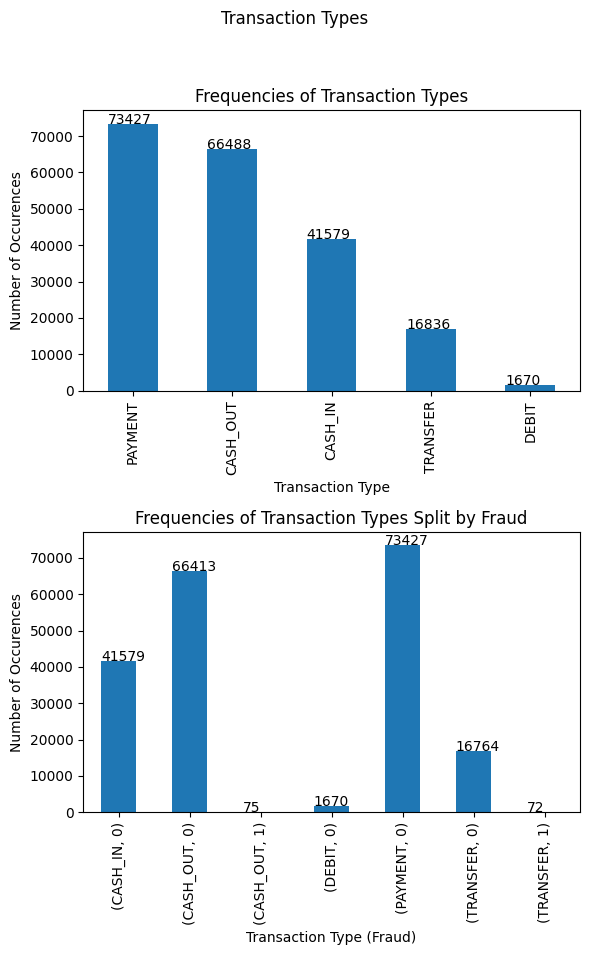

In [42]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
       return df.groupby(['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Frequencies of Transaction Types')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Number of Occurences')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Frequencies of Transaction Types Split by Fraud')
    axs[1].set_xlabel('Transaction Type (Fraud)')
    axs[1].set_ylabel('Number of Occurences')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    print('Conclusions:')
    print('1. Transactions with Fraud Cases: CASH_OUT and TRANSFER')
    print('2. Transaction without Fraud Cases: PAYMENT, CASH_IN, DEBIT')
    print()
    print('Transaction Description based on Analysis:')
    print('1. PAYMENT Transactions: Highest transaction volumes with 73, 427 occurences. No fraud cases detected in this category, suggesting strong security measures or low interest from fraudsters.')
    print('2. CASH_OUT Transactions: 66,488 occurences with 75 fraud cases (fraud rate: 0.11%), making this transaction type prone to fraudulent activity, though the percentage is still quite low compared to the total volume.')
    print('3. CASH_IN Transactions: 41,579 occurences with no fraud cases reported, similar to PAYMENT transactions.')
    print('4. TRANSFER Transactions: 16,836 occurences with 72 fraud cases (fraud rate: 0.43%). This shows that this transaction type also poses a moderate risk for fraud.')
    print('5. DEBIT Transactions: 1,670 total occurences, the lowest among all transaction types. No fraud cases observed.')
    print()
    print('Recommendations:')
    print('1. Enhanced monitoring for CASH_OUT and TRANSFER transactions as both transaction types are vulnerable to fraud.')
    print('2. Fraud Prevention Strategies for both CASH_OUT and TRANSFER transactions. Consider adding extra authentication methods or monitoring for unusual patterns and limiting transfer sizes based on risk scoring.')
    print('3. Review and reinforce security for PAYMENT, CASH_IN and DEBIT transactions because although no fraud has been detected, it is crucial to regularly audit and update security measures to maintain their fraud-free status.')
    print('4. Given the observed fraud in CASH_OUT and TRANSFER transactions, consider integrating predictive fraud detection models based on transaction history and behavior analysis.')
    print('5. Customer education on fraudulent activities to increase awareness regarding potential fraud risks and safe transaction practices.')

visual_1(df)


This scatter plot shows the relationship between changes in the origin account balance (x-axis) and the destination account balance (y-axis) for CASH_OUT transactions.

1. Expected Patterns: A diagonal pattern from (-1000, 1000) to (1000, -1000) indicates typical CASH_OUT behavior, where a decrease in the origin balance corresponds to an increase in the destination balance.
2. Cluster at (0,0): A concentration around (0,0) suggests many transactions with little or no balance change, possibly incomplete or minimal-value transactions.
3. Vertical/Horizontal Lines: These indicate cases where either the origin or destination balance remains unchanged, pointing to potential anomalies or special transaction conditions.



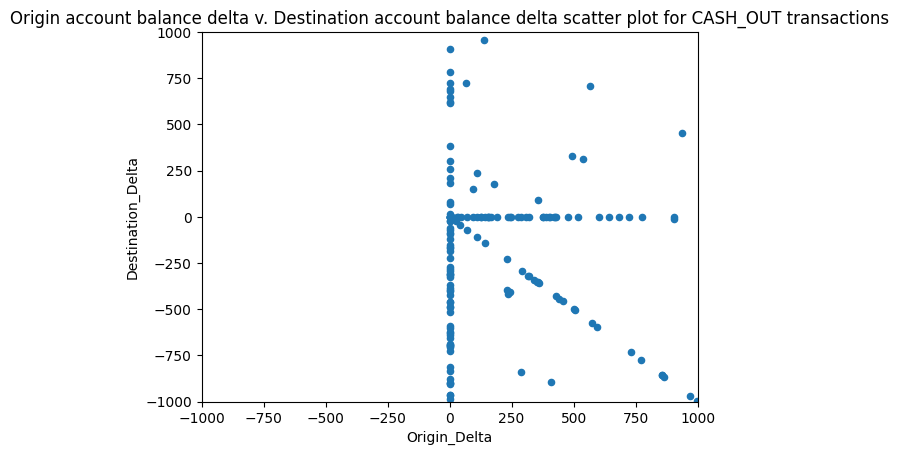

In [43]:
def visual_2(df):
    def query(df):
        df['Origin_Delta'] = df['oldbalanceOrg'] - df['newbalanceOrig']
        df['Destination_Delta'] = df['oldbalanceDest'] - df['newbalanceDest']
        return df[df['type'] == 'CASH_OUT']
    plot = query(df).plot.scatter(x='Origin_Delta',y='Destination_Delta')
    plot.set_title('Origin account balance delta v. Destination account balance delta scatter plot for CASH_OUT transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    print('This scatter plot shows the relationship between changes in the origin account balance (x-axis) and the destination account balance (y-axis) for CASH_OUT transactions.')
    print()
    print('1. Expected Patterns: A diagonal pattern from (-1000, 1000) to (1000, -1000) indicates typical CASH_OUT behavior, where a decrease in the origin balance corresponds to an increase in the destination balance.')
    print('2. Cluster at (0,0): A concentration around (0,0) suggests many transactions with little or no balance change, possibly incomplete or minimal-value transactions.')
    print('3. Vertical/Horizontal Lines: These indicate cases where either the origin or destination balance remains unchanged, pointing to potential anomalies or special transaction conditions.')
    print()
visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

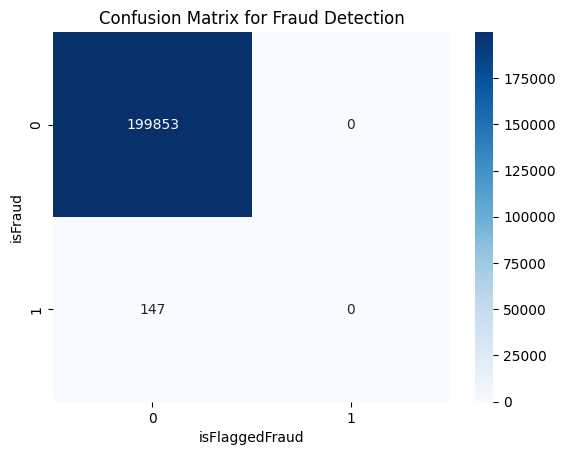

This confusion matrix provides insight into the performance of the fraud detection system.
1. True Negatives (199,853): A large number of non-fraudulent transactions were correctly classified as non-fraud, meaning the system is highly effective at identifying legitimate transactions.
2. False Negatives (147): There are 147 fraudulent transactions that were not flagged. This indicates a significant issue, as these fraudulent activites went unnoticed by the detection system. This is a critical concern for security.
3. True Positives (0): No frauduelnt transactions were correctly flagged. This means the system failed to detect any actual fraud, leading to a complete lack of fraud detection success.
4. False Positives (0): The absence of false positives is a positive outcome, meaning the system does not incorrectly flag legitimate transactions as fraudulent.

Key Insights:

1. Failure to Detect Fraud: The system has 0 true positives, showing a complete failure to catch any fraudulent trans

In [44]:
def exercise_custom(df):
  cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])
  return cm

def visual_custom(df):
    ax = plt.subplot()
    sns.heatmap(exercise_custom(df), annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('isFlaggedFraud')
    ax.set_ylabel('isFraud')
    ax.set_title('Confusion Matrix for Fraud Detection')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

    print('This confusion matrix provides insight into the performance of the fraud detection system.')
    print('1. True Negatives (199,853): A large number of non-fraudulent transactions were correctly classified as non-fraud, meaning the system is highly effective at identifying legitimate transactions.')
    print('2. False Negatives (147): There are 147 fraudulent transactions that were not flagged. This indicates a significant issue, as these fraudulent activites went unnoticed by the detection system. This is a critical concern for security.')
    print('3. True Positives (0): No frauduelnt transactions were correctly flagged. This means the system failed to detect any actual fraud, leading to a complete lack of fraud detection success.')
    print('4. False Positives (0): The absence of false positives is a positive outcome, meaning the system does not incorrectly flag legitimate transactions as fraudulent.')
    print()
    print('Key Insights:')
    print()
    print('1. Failure to Detect Fraud: The system has 0 true positives, showing a complete failure to catch any fraudulent transactions, raising significant concerns about the effectiveness of the fraud detection mechanism.')
    print('2. Perfect Accuracy in Non-Fraud Cases: While the system is excellent at identifying non-fraudulent transactions (high true negatives), this over-focus on avoiding false positives could come at the cost of missing fraud cases.')
    print('3. System Weakness: The confusion matrix reveals a major flaw in fraud detection, especially in scenarios where real fraud is not flagged. This suggests the system needs significant improvements, possibly by enhancing the fraud detection model or adjusting flagging thresholds to reduce false negatives.')
    print('In conclusion, while the system performs well for legitimate transactions, its inability to detect fraud highlights a severe gap that must be addressed for improved security.')
visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.